### Read MPU9250 static to calculate bias

In [1]:
import pandas as pd 

df = pd.read_csv('mpu9250.csv')

df = df.drop(['Unnamed: 0'],axis = 1)

df.head()

,gx,gy,gz,ax,ay,az,mx,my,mz
0,0.488281,1.113892,-8.171082,-0.102966,-0.047852,0.872742,49.539013,53.594978,-53.843311
1,0.549316,1.144409,-7.911682,-0.103455,-0.046570,0.877869,49.539013,53.594978,-53.843311
2,0.488281,1.167297,-8.140564,-0.100769,-0.047729,0.877991,49.539013,53.594978,-53.843311
3,0.534058,1.144409,-8.018494,-0.100342,-0.048767,0.878052,49.539013,53.594978,-53.843311
4,0.465393,1.220703,-7.888794,-0.102478,-0.050476,0.875977,49.539013,53.594978,-53.843311


In [2]:
gx_bias = df['gx'].mean()
gx_bias

0.4924333792576368

In [3]:
gy_bias = df['gy'].mean()
gy_bias

1.1977653751249375

In [4]:
gz_bias = df['gz'].mean()
gz_bias

-8.054665599329242

### Read MPU9250

In [5]:
import pandas as pd

df = pd.read_csv('mpu9250_move.csv')

df

,Unnamed: 0,gx,gy,gz,ax,ay,az,mx,my,mz
0,0,0.549316,1.419067,-8.049011,-0.111328,0.074341,0.850159,-72.281120,128.061920,11.889690
1,1,0.617981,1.495361,-8.071899,-0.111816,0.075439,0.851196,-72.281120,128.061920,11.889690
2,2,0.587463,1.426697,-8.033752,-0.113892,0.073364,0.849365,-72.281120,128.061920,11.889690
3,3,0.549316,1.213074,-7.980347,-0.111206,0.070190,0.849426,-72.281120,128.061920,11.889690
4,4,0.648499,1.174927,-8.094788,-0.110962,0.069336,0.853333,-72.281120,128.061920,11.889690
...,...,...,...,...,...,...,...,...,...,...
1996,1996,27.793884,21.141052,-8.117676,-0.242065,-0.509888,0.769714,39.137585,49.526711,-63.524921
1997,1997,36.102295,22.613525,-8.041382,-0.241211,-0.504211,0.752441,39.137585,49.526711,-63.524921
1998,1998,45.127869,24.475098,-8.094788,-0.232483,-0.492126,0.755676,41.429420,48.288544,-65.053596
1999,1999,51.261902,26.977539,-8.026123,-0.224182,-0.490845,0.763245,41.429420,48.288544,-65.053596


In [6]:
df = df.drop(['Unnamed: 0'],axis = 1)

df.head()

,gx,gy,gz,ax,ay,az,mx,my,mz
0,0.549316,1.419067,-8.049011,-0.111328,0.074341,0.850159,-72.28112,128.06192,11.88969
1,0.617981,1.495361,-8.071899,-0.111816,0.075439,0.851196,-72.28112,128.06192,11.88969
2,0.587463,1.426697,-8.033752,-0.113892,0.073364,0.849365,-72.28112,128.06192,11.88969
3,0.549316,1.213074,-7.980347,-0.111206,0.070190,0.849426,-72.28112,128.06192,11.88969
4,0.648499,1.174927,-8.094788,-0.110962,0.069336,0.853333,-72.28112,128.06192,11.88969


In [7]:
df['gx'] = df['gx'] - gx_bias
df['gy'] = df['gy'] - gy_bias
df['gz'] = df['gz'] - gz_bias

In [8]:
import numpy as np

# convert deg to rad
df['gx'] = df['gx'] * np.pi/180
df['gy'] = df['gy'] * np.pi/180
df['gz'] = df['gz'] * np.pi/180

In [9]:
df

,gx,gy,gz,ax,ay,az,mx,my,mz
0,0.000993,0.003862,0.000099,-0.111328,0.074341,0.850159,-72.281120,128.061920,11.889690
1,0.002191,0.005194,-0.000301,-0.111816,0.075439,0.851196,-72.281120,128.061920,11.889690
2,0.001659,0.003996,0.000365,-0.113892,0.073364,0.849365,-72.281120,128.061920,11.889690
3,0.000993,0.000267,0.001297,-0.111206,0.070190,0.849426,-72.281120,128.061920,11.889690
4,0.002724,-0.000399,-0.000700,-0.110962,0.069336,0.853333,-72.281120,128.061920,11.889690
...,...,...,...,...,...,...,...,...,...
1996,0.476500,0.348076,-0.001100,-0.242065,-0.509888,0.769714,39.137585,49.526711,-63.524921
1997,0.621509,0.373776,0.000232,-0.241211,-0.504211,0.752441,39.137585,49.526711,-63.524921
1998,0.779035,0.406266,-0.000700,-0.232483,-0.492126,0.755676,41.429420,48.288544,-65.053596
1999,0.886094,0.449942,0.000498,-0.224182,-0.490845,0.763245,41.429420,48.288544,-65.053596


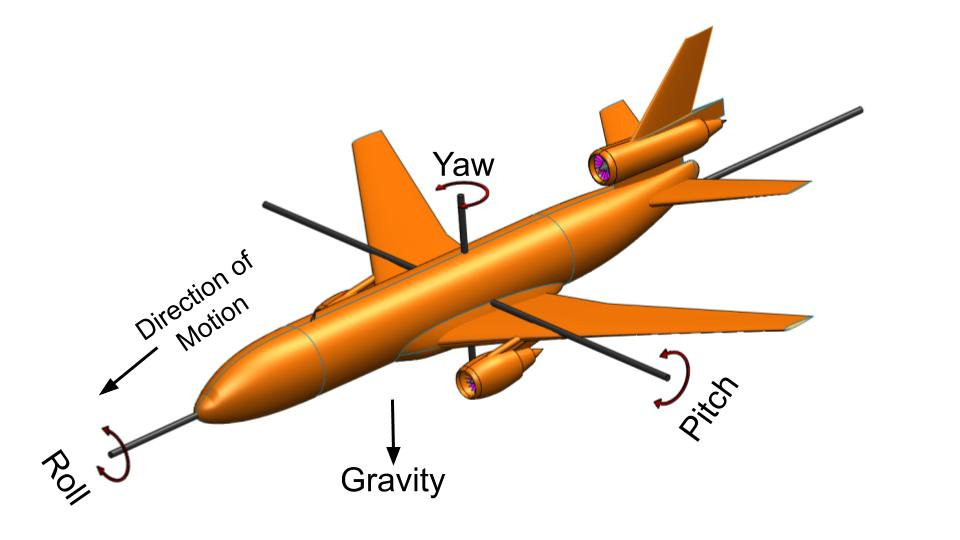

# 1/ Complimentary filter

#### Choise filter alpha

$$a = 0.1$$

#### Time step 

$$\Delta t = 0.0185$$

#### Calculate Roll, Pitch via Euler angle derivatives 

$$
\begin{pmatrix} \dot{\phi} \\  \dot{\theta} \\ \dot{\psi} \end{pmatrix} =
\begin{pmatrix} 1 & \sin{\hat{\phi_{t}}}\tan{\hat{\theta_{t}}} & \cos{\hat{\phi_{t}}}\tan{\hat{\theta_{t}}}\\
                0 & \cos{\hat{\phi_{t}}} & -\sin{\hat{\phi_{t}}}\\ 
                0 & \sin{\hat{\phi_{t}}}\sec{\hat{\theta_{t}}} & \cos{\hat{\phi_{t}}}\sec{\hat{\theta_{t}}}
\end{pmatrix}
\begin{pmatrix} gyro_{x} \\  gyro_{y} \\ gyro_{z} \end{pmatrix}
$$

#### Calculate Roll,Picth via Acceleration

$$ \hat{\phi}_{Acc}  = \arctan{ \frac{ A_{y} }{ \sqrt{ A^2_{x} + A^2_{z} } } }$$

$$ \hat{\theta}_{Acc}  = \arctan{ \frac{ A_{x} }{ \sqrt{ A^2_{y} + A^2_{z} } } }$$

#### Calculate complimentary filter

$$ \hat{\phi}_{t+1} = (1-a)(\hat{\phi}_{t} + \dot{\phi} \Delta{t}) + a \hat{\phi}_{Acc}$$
$$ \hat{\theta}_{t+1} = (1-a)(\hat{\theta}_{t} + \dot{\theta} \Delta{t}) + a \hat{\theta}_{Acc}$$

In [10]:
# Calculate Roll,Picth via Acceleration

df['roll_acc'] = np.arctan2(df['ay'],np.sqrt(df['ax']**2+df['az']**2))
df['pitch_acc'] = np.arctan2(df['ax'],np.sqrt(df['ay']**2+df['az']**2))

df

,gx,gy,gz,ax,ay,az,mx,my,mz,roll_acc,pitch_acc
0,0.000993,0.003862,0.000099,-0.111328,0.074341,0.850159,-72.281120,128.061920,11.889690,0.086487,-0.129719
1,0.002191,0.005194,-0.000301,-0.111816,0.075439,0.851196,-72.281120,128.061920,11.889690,0.087647,-0.130112
2,0.001659,0.003996,0.000365,-0.113892,0.073364,0.849365,-72.281120,128.061920,11.889690,0.085401,-0.132806
3,0.000993,0.000267,0.001297,-0.111206,0.070190,0.849426,-72.281120,128.061920,11.889690,0.081751,-0.129741
4,0.002724,-0.000399,-0.000700,-0.110962,0.069336,0.853333,-72.281120,128.061920,11.889690,0.080401,-0.128888
...,...,...,...,...,...,...,...,...,...,...,...
1996,0.476500,0.348076,-0.001100,-0.242065,-0.509888,0.769714,39.137585,49.526711,-63.524921,-0.563563,-0.256409
1997,0.621509,0.373776,0.000232,-0.241211,-0.504211,0.752441,39.137585,49.526711,-63.524921,-0.567974,-0.260268
1998,0.779035,0.406266,-0.000700,-0.232483,-0.492126,0.755676,41.429420,48.288544,-65.053596,-0.556763,-0.252306
1999,0.886094,0.449942,0.000498,-0.224182,-0.490845,0.763245,41.429420,48.288544,-65.053596,-0.552852,-0.242196


In [11]:
import math

alpha = 0.1
dt = 0.01
phi_hat = 0
theta_hat = 0

phi_gyro = []
theta_gyro = []

phi_cf = []
theta_cf = []

#
for i in range(df.shape[0]):
    # angle by acc
    roll_acc = df['roll_acc'][i]
    theta_acc = df['pitch_acc'][i]
    
    #euler derivative
    phi_dot = df['gx'][i] + math.sin(phi_hat)*math.tan(theta_hat)*df['gy'][i] + math.cos(phi_hat)*math.tan(theta_hat)
    theta_dot = math.cos(phi_hat)*df['gy'][i] - math.sin(phi_hat)*df['gz'][i]
    
    #complimentary filter
    phi_hat_now = (1 - alpha)*(phi_hat + phi_dot*dt) + alpha * roll_acc
    theta_hat_now = (1 - alpha)*(theta_hat + theta_dot*dt) + alpha * theta_acc
    
    phi_cf.append(phi_hat_now)
    theta_cf.append(theta_hat_now)
    
    phi_hat = phi_hat_now 
    theta_hat = theta_hat_now

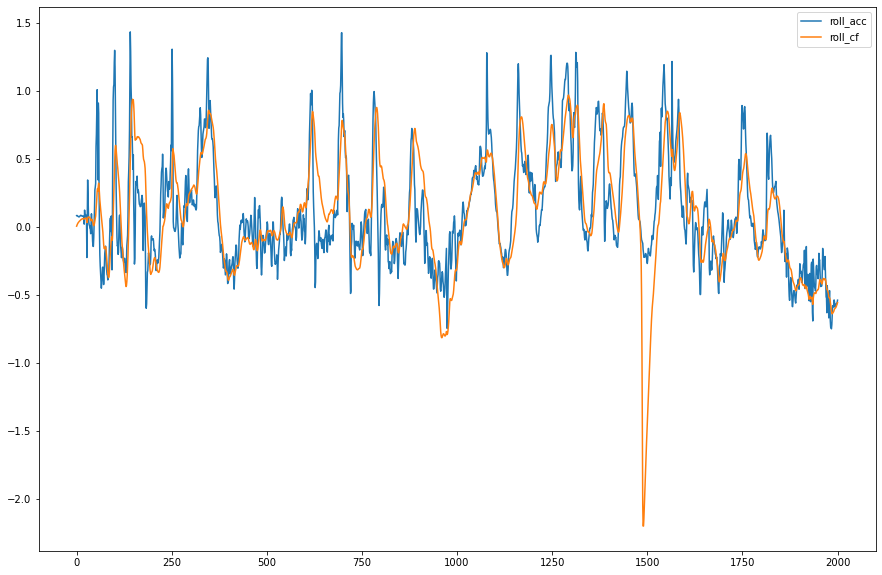

In [12]:
import matplotlib.pyplot as plt

step = np.arange(df.shape[0])

fig,ax =plt.subplots(figsize= (15,10))

ax.plot(step,df['roll_acc'],label = 'roll_acc')
ax.plot(step,phi_cf,label = 'roll_cf')

plt.legend()
plt.show()

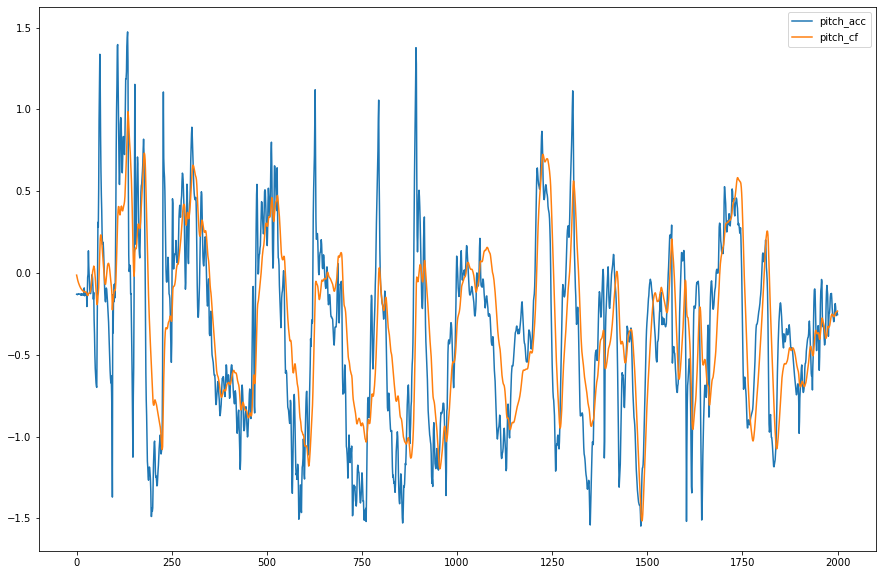

In [13]:
fig,ax =plt.subplots(figsize= (15,10))

ax.plot(step,df['pitch_acc'],label = 'pitch_acc')
ax.plot(step,theta_cf,label = 'pitch_cf')

plt.legend()
plt.show()

# 2/ Kalman filter

### step1: initialize matrices an variables

$$ C = \begin{pmatrix} 1 & 0 & 0 & 0 \\ 0 & 0 & 1 & 0 \end{pmatrix} $$

$$ P = \begin{pmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 1 & 0 \\ 0 & 0 & 0 & 1 \end{pmatrix} $$

$$ Q = P $$

$$ R = \begin{pmatrix} 1 & 0 \\ 0 & 1 \end{pmatrix} $$

$$ \hat{\phi_{t}} = 0 $$

$$ \hat{\theta_{t}} = 0 $$

$$ \Delta t = 0.01 $$

$$ t_{current} = datetime.now() $$


### step2: Get the offset (Assume that is not offset of the angle calculate by acc is zero)

## Go to loop for 

### step3: Update sampling time

$$ \Delta t = time() - t_{current} $$
$$ t_{current} = time() $$

### step4: Calculate Roll,Picth via Acceleration

$$ \hat{\phi}_{Acc}  = \arctan{ \frac{ A_{y} }{ \sqrt{ A^2_{x} + A^2_{z} } } }$$

$$ \hat{\theta}_{Acc}  = \arctan{ \frac{ A_{x} }{ \sqrt{ A^2_{y} + A^2_{z} } } }$$

#### convert to degree

$$ \hat{\phi}_{Acc}  = \hat{\phi}_{Acc} 180/\pi$$

$$ \hat{\theta}_{Acc}  = \hat{\theta}_{Acc} 180/\pi$$

#### Update measurement vector

$$ z^{\to}_{t} = \begin{pmatrix} \hat{\phi}_{Acc} \\ \hat{\theta}_{Acc} \end{pmatrix}$$

### step5: Get gyrometer value from sensor


### step6: Calculate Roll, Pitch via Euler angle derivatives 

$$
\begin{pmatrix} \dot{\phi} \\  \dot{\theta} \\ \dot{\psi} \end{pmatrix} =
\begin{pmatrix} 1 & \sin{\hat{\phi_{t}}}\tan{\hat{\theta_{t}}} & \cos{\hat{\phi_{t}}}\tan{\hat{\theta_{t}}}\\
                0 & \cos{\hat{\phi_{t}}} & -\sin{\hat{\phi_{t}}}\\ 
                0 & \sin{\hat{\phi_{t}}}\sec{\hat{\theta_{t}}} & \cos{\hat{\phi_{t}}}\sec{\hat{\theta_{t}}}
\end{pmatrix}
\begin{pmatrix} gyro_{x} \\  gyro_{y} \\ gyro_{z} \end{pmatrix}
$$

#### Update gyro input vector

$$ u^{\to}_{t} = \begin{pmatrix} \dot{\phi} \\ \dot{\theta} \end{pmatrix}$$

### step7: Update A,B matrix at current time  

#### Prediction

$$ A = \begin{pmatrix} 1 & -\Delta t & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 1 & -\Delta t \\ 0 & 0 & 0 & 1 \end{pmatrix} $$

$$ B = \begin{pmatrix} \Delta t & 0 \\ 0 & 0 \\ 0 & \Delta t \\ 0 & 0 \end{pmatrix} $$

### step8: Predict and update follow this step

#### Prediction

$$ x^{\to}_{t+1} = A x^{\to}_{t} + B u^{\to}_{t} $$

$$ P = A P A^{T} + Q $$

#### Update

$$ y^{\to}_{t+1} = z^{\to}_{t} - C x^{\to}_{t+1} $$

$$ S = C P C^{T} + R $$

$$ K = P C^{T} S^{-1} $$

$$ x^{\to}_{t+1} = x^{\to}_{t+1} + K y^{\to}_{t+1} $$

$$ P = (I_{4} - KC)P$$

#### Show the state_estimate vector

$$ x^{\to}_{t} = \begin{pmatrix} \hat{\phi}_{t} \\ b_{\hat{\phi}_{t}} \\ \hat{\theta}_{t} \\ b_{\hat{\theta}_{t}} \end{pmatrix}$$

In [17]:
# step1 initialize matrices and variables

C = np.array([[1,0,0,0],[0,0,1,0]])

print(C.shape)

C

(2, 4)


array([[1, 0, 0, 0],
       [0, 0, 1, 0]])

In [18]:
P = np.eye(4)

print(P.shape)

P

(4, 4)


array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [20]:
Q = np.eye(4)

print(Q.shape)

Q

(4, 4)


array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [21]:
R = np.array([[1,0],[0,1]])

print(R.shape)

print(R)

(2, 2)
[[1 0]
 [0 1]]


In [23]:
state_estimate =np.array([[0],[0],[0],[0]])

print(state_estimate.shape)

state_estimate

(4, 1)


array([[0],
       [0],
       [0],
       [0]])

In [26]:
from time import time

phi_hat = 0
theta_hat = 0

phi_kf = []
theta_kf = []

dt = 0

current_time = time()
print(current_time)

1630944231.5451744


In [28]:
# step2 ge offset ofthe acceleratometer
offset_phi = 0.01
offset_theta = 0.01

In [37]:
# step3 update the sampling time
current_time= time()

In [38]:
dt = time()- current_time
print(dt)

0.10700607299804688


In [41]:
# step4 calculate angle via acceleratometer
phi_hat_acc= np.arctan(df['ay'][0])/np.sqrt( df['ax'][0]**2 +  df['az'][0]**2 )
theta_hat_acc= np.arctan(df['ax'][0])/np.sqrt( df['ay'][0]**2 +  df['az'][0]**2 )

#get vector z measurement
measurement = np.array([[phi_hat_acc],[theta_hat_acc]])

print("phi_hat_acc: {}".format(phi_hat_acc))
print("theta_hat_acc: {}".format(theta_hat_acc))
print(measurement.shape)
print(measurement)

phi_hat_acc: 0.08654403995445117
theta_hat_acc: -0.12991705908363615
(2, 1)
[[ 0.08654404]
 [-0.12991706]]


In [42]:
# step5: get current value of gyroscope substract with bias 
p = df['gx'][0] # already at rad/s gyrox
q = df['gy'][0] # already at rad/s gyroy
r = df['gz'][0] # already at rad/s gyroz

In [43]:
# step6: calculate euler angle derivatives
phi_dot= p + math.sin(phi_hat)*math.tan(theta_hat) * q + math.cos(phi_hat)*math.tan(theta_hat) * r
theta_dot = math.cos(phi_hat) * q - math.sin(phi_hat) * r

#get vector gyro_input
gyro_input = np.array([[phi_dot],[theta_dot]])

print("p: " + str(p))
print("q: " + str(q))

print(gyro_input.shape)

print(gyro_input)

p: 0.0009927961095175452
q: 0.0038624486754217677
(2, 1)
[[0.0009928 ]
 [0.00386245]]


In [44]:
# step7: update matrix A,B
A = np.array([[1,-dt,0,0],[0,1,0,0],[0,0,1,-dt],[0,0,0,1]])
B = np.array([[dt,0],[0,0],[0,dt],[0,0]])

print(A.shape)
print(A)
print(B.shape)
print(B)

(4, 4)
[[ 1.         -0.10700607  0.          0.        ]
 [ 0.          1.          0.          0.        ]
 [ 0.          0.          1.         -0.10700607]
 [ 0.          0.          0.          1.        ]]
(4, 2)
[[0.10700607 0.        ]
 [0.         0.        ]
 [0.         0.10700607]
 [0.         0.        ]]


In [67]:
# step8: predict and update follow below

#predict
#state_estimate =  A @ state_estimate + B @ gyro_input
#state_estimate =  A.dot(state_estimate) + B.dot(gyro_input)
state_estimate = np.matmul(A,state_estimate) + np.matmul(B,gyro_input)

print(state_estimate)

[[0.00244341]
 [0.        ]
 [0.00950603]
 [0.        ]]


In [68]:
# calculate matrix P
P = A @ P @ A.T + Q

print(P)

[[ 2.0114503  -0.10700607  0.          0.        ]
 [-0.10700607  2.          0.          0.        ]
 [ 0.          0.          2.0114503  -0.10700607]
 [ 0.          0.         -0.10700607  2.        ]]


In [69]:
# update
# calculate vector y

y_tilde = measurement - C @ state_estimate

y_tilde

array([[ 0.08410063],
       [-0.13942308]])

In [70]:
# calculate S 
S = C @ P @ C.T + R

S

array([[3.0114503, 0.       ],
       [0.       , 3.0114503]])

In [71]:
# calculate K
K = P @ C.T @ np.linalg.inv(S)

K

array([[ 0.66793408,  0.        ],
       [-0.03553307,  0.        ],
       [ 0.        ,  0.66793408],
       [ 0.        , -0.03553307]])

In [72]:
# update state estimate
state_estimate = state_estimate + K @ y_tilde

state_estimate

array([[ 0.05861709],
       [-0.00298835],
       [-0.0836194 ],
       [ 0.00495413]])

In [73]:
# calculate P matrix
P = (np.eye(4) - K @ C) @ P

P

array([[ 0.66793408, -0.03553307,  0.        ,  0.        ],
       [-0.03553307,  1.99619775,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.66793408, -0.03553307],
       [ 0.        ,  0.        , -0.03553307,  1.99619775]])

In [77]:
phi_kl  = state_estimate[0]
theta_kl = state_estimate[2]

print("phi_kl: %s" %phi_kl)
print("theta_kl: %s" %theta_kl)


phi_kl: [0.05861709]
theta_kl: [-0.0836194]


In [79]:
# Full code

# initialize matrices and variables
C = np.array([[1,0,0,0],[0,0,1,0]])
P = np.eye(4)
Q = np.eye(4)
R = np.array([[1,0],[0,1]])
state_estimate = np.array([[0],[0],[0],[0]])

# assume dt as a constant
dt = 0.01

# create a phi_kf, theta_kf
phi_kf = []
theta_kf = []

for i in range(df.shape[0]):
    
    # calculate angle via acceleratometer
    phi_hat_acc = np.arctan(df['ay'][i]/np.sqrt(df['ax'][i]**2 + df['az'][i]**2))
    theta_hat_acc = np.arctan(df['ax'][i]/np.sqrt(df['ay'][i]**2 + df['az'][i]**2))
    
    # get measurement vector z
    measurement = np.array([[phi_hat_acc],[theta_hat_acc]])
    
    # get the current value of gyroscope and substract with data
    p = df['gx'][i]
    q = df['gy'][i]
    r = df['gz'][i]
    
    # calculate euler angle derivatives
    phi_dot = p + math.sin(phi_hat)*math.tan(theta_hat)*q + math.cos(phi_hat)*math.tan(theta_hat)
    theta_dot = math.cos(phi_hat)*q - math.sin(phi_hat)*r
    
    # get vector gyro_input
    gyro_input = np.array([[phi_dot],[theta_dot]])
    
    # update matrix A,B
    A = np.array([[1,-dt,0,0],
                  [0,1,0,0],
                  [0,0,1,-dt],
                  [0,0,0,1]])
    
    B = np.array([[dt,0],
                  [0,0],
                  [0,dt],
                  [0,0]])
    
    # calculate state estimate
    state_estimate = A @ state_estimate + B @ gyro_input
    
    # calculate matrix P
    P = A @ P @ A.T + Q
    
    # update
    # calculate vector y
    y_tilde = measurement - C @ state_estimate
    # calculate S
    S = C @ P @ C.T + R
    # caculate K
    K = P @ C.T @np.linalg.inv(S)
    # update state_estimate
    state_estimate = state_estimate + K @ y_tilde
    # calculate P matrix
    P = (np.eye(4) - K @ C) @ P
    
    phi_kf_val = state_estimate[0][0]
    theta_kf_val = state_estimate[2][0]
    
    phi_kf.append(phi_kf_val)
    theta_kf.append(theta_kf_val)

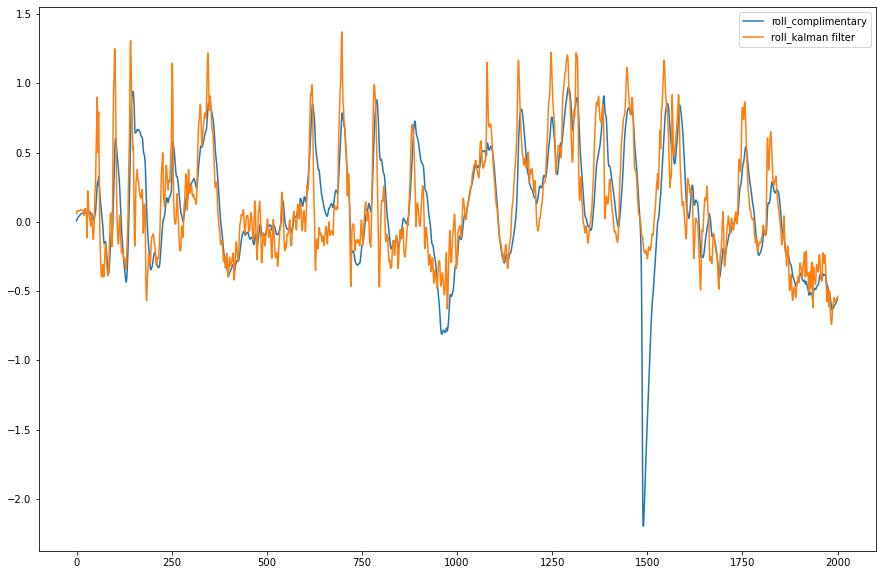

In [80]:
import matplotlib.pyplot as plt

step = np.arange(df.shape[0])

fig,ax=  plt.subplots(figsize = (15,10))

ax.plot(step,phi_cf,label = 'roll_complimentary')
ax.plot(step,phi_kf,label = 'roll_kalman filter')

plt.legend()
plt.show()

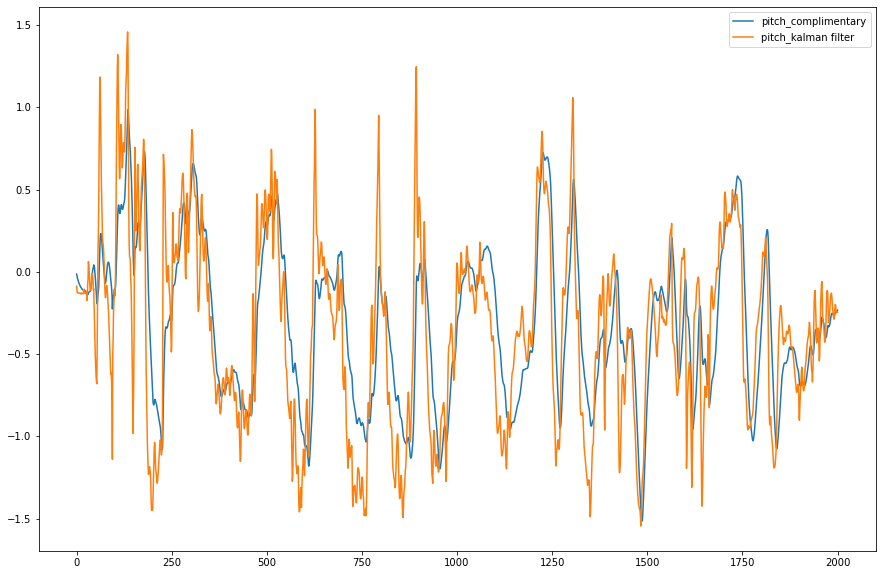

In [81]:
import matplotlib.pyplot as plt

step = np.arange(df.shape[0])

fig,ax=  plt.subplots(figsize = (15,10))

ax.plot(step,theta_cf,label = 'pitch_complimentary')
ax.plot(step,theta_kf,label = 'pitch_kalman filter')

plt.legend()
plt.show()

In [82]:
class kalman_filter:
    """
    A     : Ma tran chuyen trang thai
    B     : Ma tran mo hinh dieu khien
    u     : vecto dieu khien he thong do nguoi dung nhap
    sigma : Ma tran hiep phuong sai so
    Q     : Ma tran hiep phuong sai nhieu he thong
    R     : Ma tran hiep phuong sai nhieu quan sat
    H     : Ma tran mo hinh quan sat
    x_hat : Gia tri du doan boi Kalman filter
    y     : vector ngau nhien quan sat duoc
    """
    def __init__(self,A,B,sigma_init,xhat_init,H):
        self.A = A
        self.B = B
        self.sigma = sigma_init
        self.H = H
        self.x_hat = xhat_init
        self.kalman_gain = np.array([[0]])
        
    def calc_hat(self,Q,R,y,u):
        self.u = u
        self.Q = Q
        self.R = R
        self.y = y
        
        #prediction
        self.x_hat = self.A @ self.x_hat + self.B @ self.u
        self.sigma = self.A @ self.sigma @ self.A.T + self.Q
        
        # measurement
        self.kalman_gain = self.sigma @ self.H.T @ np.linalg.inv(self.H @ self.sigma @ self.H.T + self.R)
        self.x_hat = self.x_hat + self.kalman_gain @ (self.y - self.H @ self.x_hat)
        self.sigma = (np.eye(len(self.sigma)) - self.kalman_gain @ self.H) @ self.sigma
        
        return float(self.x_hat)

In [83]:
x = np.array([[-0.28]]) # real value
A = np.array([[1]])     # Transmission matrix
Q = np.array([[1e-6]])  # Systems noise matrix
H = np.array([[1]])     # Observation matrix
R = np.array([[0.01]])  # Measurement noise matrix
u = np.array([0])       # Control vector
B = np.array([[0]])     # Control matrix

# initialize value
x_init  = np.array([[0.5]])
sigma_init = np.array([[1.0]])

# storage values
x_vals = []
y_vals = []

# total step for simulate
n_iteration = 100

In [86]:
def simulate_sensor(x,H,R):
    """
    Observation model y = Gx + v or Hx + v
    v ~ N(0,R)
    x: Real value
    H: Observation matrix
    R: Measurement noise matrix
    y: Random value read from sensor with noise
    """
    mean_val = np.zeros(shape = R.shape[0])
    return float(H @ x + np.random.multivariate_normal(mean = mean_val,cov = R))

In [87]:
KF_filter = kalman_filter(A,B,sigma_init,x_init,H)

In [88]:
for i in range(n_iteration):
    # simulate signal observation
    y = simulate_sensor(x,H,Q)
    y_vals.append(y)
    # Apply Kalman filter
    x_hat = KF_filter.calc_hat(Q= Q, R= R,y= y,u = u)
    x_vals.append(x_hat)

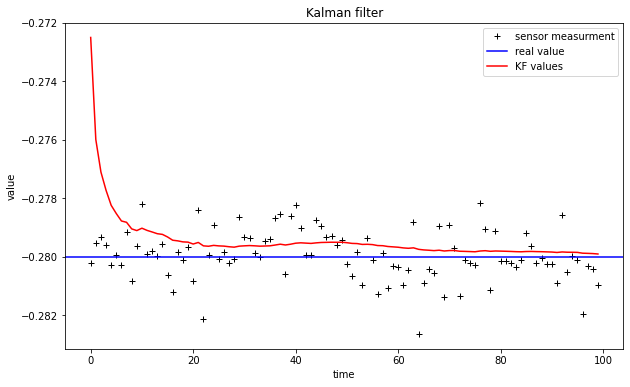

In [89]:
import matplotlib.pyplot as plt 

fig,ax = plt.subplots(figsize = (10,6))
ax.plot(y_vals,"k+",label = "sensor measurment")
ax.axhline(x,color = 'b',label = 'real value')
ax.plot(x_vals,'r-',label = 'KF values')

plt.legend()
plt.xlabel('time')
plt.ylabel('value')
plt.title('Kalman filter')

plt.show()

## 3/ Extend Kalman filter